In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os

from sklearn.metrics import log_loss, accuracy_score

import ast

from scipy.stats import wilcoxon

In [2]:
datasets = set(x.split('_')[0] for x in os.listdir('single_pass_vs_tree'))

print('Dataset \t\t\t\t Tree+Transform  \t\t Transform ')
print('-'*85)
tree_accs = []
transform_accs = []
for dataset in datasets:
    #if dataset == 'Beef': continue
    ground_truth = pd.read_csv('../pyshapelets/data/partitioned/{}/{}_test.csv'.format(dataset, dataset))['target']
    
    tree_shapelets = open('single_pass_vs_tree/{}_shaps_tree.txt'.format(dataset), 'r').readlines()
    transform_shapelets = open('single_pass_vs_tree/{}_shaps_transform.txt'.format(dataset), 'r').readlines()
    
    tree_shapelets_vectors = []
    for shap in tree_shapelets:
        tree_shapelets_vectors.append(ast.literal_eval(shap))
    
    transform_shapelets_vectors = []
    for shap in transform_shapelets:
        transform_shapelets_vectors.append(ast.literal_eval(shap))
    
    map_dict = {}
    for j, c in enumerate(np.unique(ground_truth)):
        map_dict[c] = j
    ground_truth = ground_truth.map(map_dict)
    
    rf_tree = pd.read_csv('single_pass_vs_tree/{}_rf_preds_tree.csv'.format(dataset)).drop('Unnamed: 0', axis=1)
    rf_transform = pd.read_csv('single_pass_vs_tree/{}_rf_preds_transform.csv'.format(dataset)).drop('Unnamed: 0', axis=1)
    print(
        dataset, '\t\t' + '\t'*(len(dataset) < 25) + '\t'*(len(dataset) < 15) + '\t'*(len(dataset) < 7),
        np.round(accuracy_score(ground_truth, np.argmax(rf_tree.values, axis=1)), 2), len(tree_shapelets), '\t\t\t', 
        np.round(accuracy_score(ground_truth, np.argmax(rf_transform.values, axis=1)), 2), len(transform_shapelets)
    )
    
    tree_accs.append(accuracy_score(ground_truth, np.argmax(rf_tree.values, axis=1)))    
    transform_accs.append(accuracy_score(ground_truth, np.argmax(rf_transform.values, axis=1)))
print()
#print(tree_accs, transform_accs)
print(wilcoxon(tree_accs, transform_accs))

"""
TO CHECK:

* MoteStrain
* Coffee
* ArrowHead
----
* GunPoint
* ECG2200
"""

Dataset 				 Tree+Transform  		 Transform 
-------------------------------------------------------------------------------------
ProximalPhalanxOutlineAgeGroup 		 0.85 23 			 0.81 40
DistalPhalanxTW 			 0.7 35 			 0.61 40
MedicalImages 				 0.68 53 			 0.64 49
SyntheticControl 			 0.9 11 			 0.84 30
ECG200 					 0.79 6 			 0.82 48
Wine 					 0.74 4 			 0.67 117
ToeSegmentation1 			 0.93 1 			 0.93 138
Symbols 				 0.91 5 			 0.87 199
SonyAIBORobotSurface1 			 0.72 1 			 0.65 35
MiddlePhalanxTW 			 0.55 53 			 0.52 40
FacesUCR 				 0.73 38 			 0.66 65
ShapeletSim 				 1.0 1 			 1.0 28
BirdChicken 				 0.65 1 			 0.65 256
MiddlePhalanxOutlineAgeGroup 		 0.59 27 			 0.46 40
Beef 					 0.63 5 			 0.8 235
CBF 					 0.95 2 			 0.93 64
Plane 					 0.96 7 			 0.97 72
MoteStrain 				 0.79 2 			 0.87 42
BeetleFly 				 0.7 2 			 0.65 97
ProximalPhalanxTW 			 0.75 28 			 0.71 40
ECGFiveDays 				 0.99 1 			 0.99 68
Lightning7 				 0.66 13 			 0.66 146
ArrowHead 				 0.66 2 			 0.7 125
ItalyPowerDem

'\nTO CHECK:\n\n* MoteStrain\n* Coffee\n* ArrowHead\n----\n* GunPoint\n* ECG2200\n'

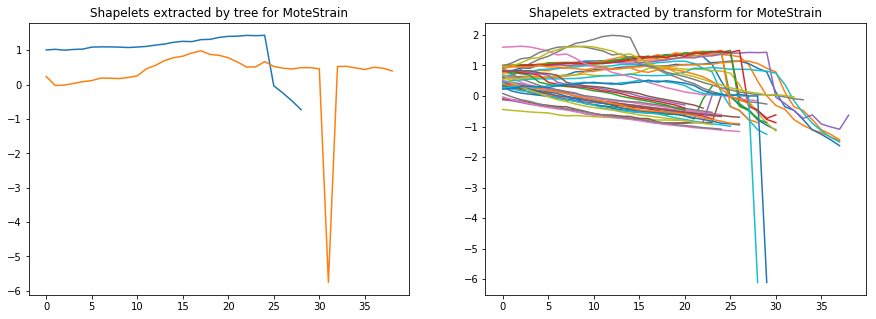

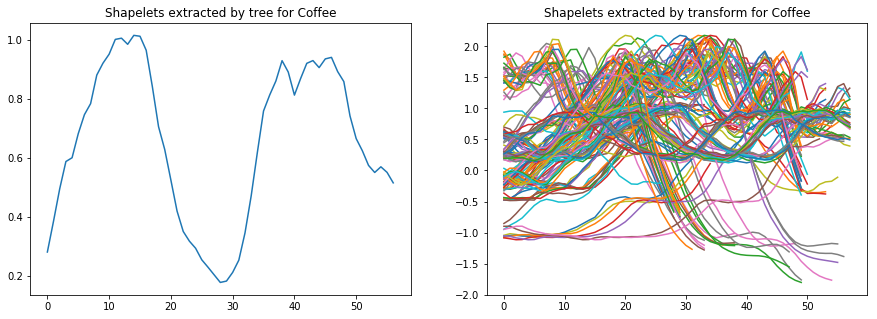

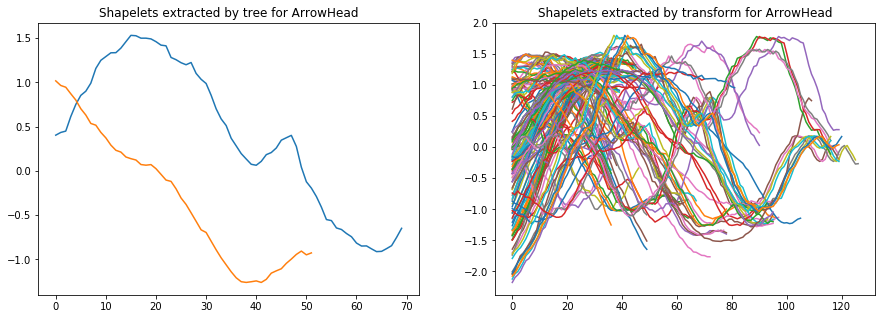

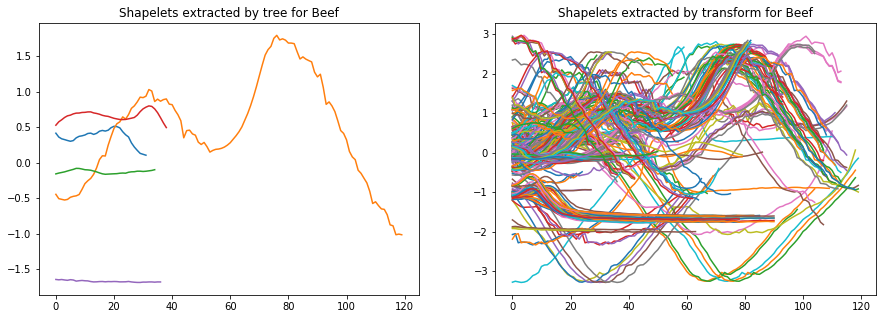

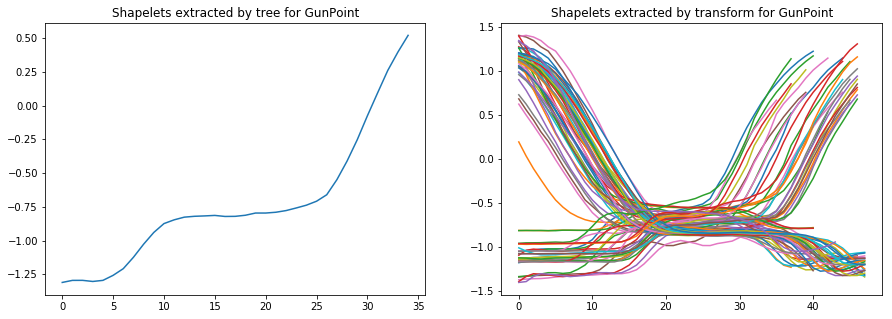

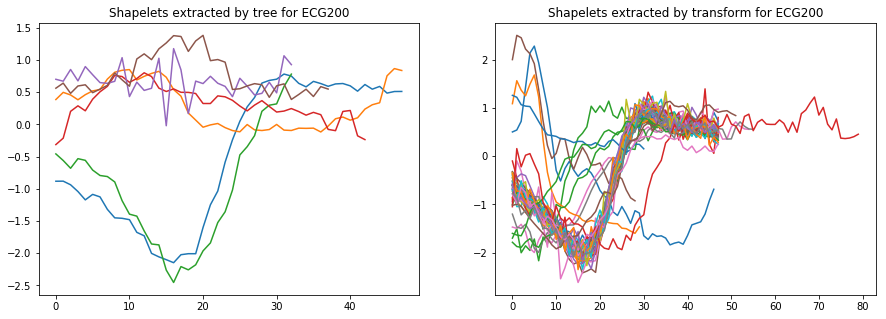

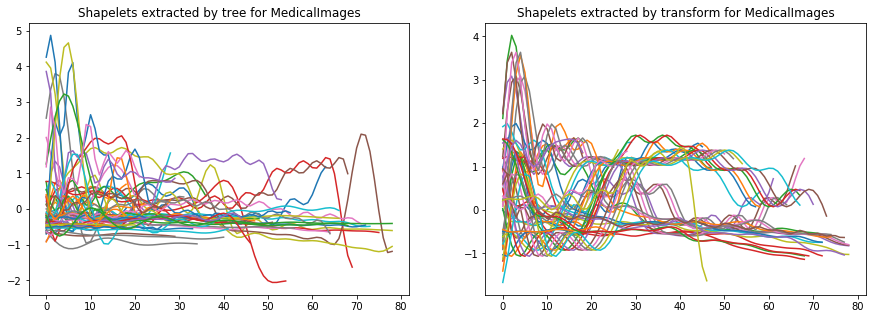

In [17]:
for dataset in ['MoteStrain', 'Coffee', 'ArrowHead', 'Beef', 'GunPoint', 'ECG200' ,'DiatomSizeReduction']:
    tree_shapelets = open('single_pass_vs_tree/{}_shaps_tree.txt'.format(dataset), 'r').readlines()
    transform_shapelets = open('single_pass_vs_tree/{}_shaps_transform.txt'.format(dataset), 'r').readlines()
    
    tree_shapelets_vectors = []
    for shap in tree_shapelets:
        tree_shapelets_vectors.append(ast.literal_eval(shap))
    
    transform_shapelets_vectors = []
    for shap in transform_shapelets:
        transform_shapelets_vectors.append(ast.literal_eval(shap))
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    for shap in tree_shapelets_vectors:
        plt.plot(range(len(shap)), shap)
    plt.title('Shapelets extracted by tree for {}'.format(dataset))

    plt.subplot(1,2,2)
    for shap in transform_shapelets_vectors:
        plt.plot(range(len(shap)), shap)
    plt.title('Shapelets extracted by transform for {}'.format(dataset))

    plt.show()